In [1]:
import meop
import meop_filenames
from importlib import reload
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/envs/python_matlab/share/proj failed


## compute MLD and store data in a pandas dataframe

In [2]:
# choose quality level
qf = 'fr1'

In [4]:
# selection mode 1: list of filenames
list_smru_name=['ft22-874-18', 'ft22-875-18', 'ft22-882-18', 'ft22-876-18',
       'ft22-881-18', 'ft22-686-18', 'ft22-873-18', 'ft22-878-18',
       'ft22-879-18']
list_filenames = [meop_filenames.fname_prof(smru_name,qf=qf) for smru_name in list_smru_name]
list_filenames

[PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-874-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-875-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-882-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-876-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-881-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-686-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-873-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-878-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-879-18_fr1_prof.nc')]

In [5]:
# selection mode 2: list of names from a given deployment
deployment = 'ft22'
list_filenames = meop_filenames.list_fname_prof(deployment=deployment,qf=qf)
list_filenames

[PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-686-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-881-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-873-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-875-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-882-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-876-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-874-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-879-18_fr1_prof.nc'),
 PosixPath('/media/disk2/roquet/MEOP_process/final_dataset_prof/ft22/ft22-878-18_fr1_prof.nc')]

In [44]:
ds = meop.open_dataset(filename)
ds.add_mld()
df = ds[['LATITUDE','LONGITUDE','JULD','MLD_ADJUSTED']].to_dataframe()
smru_name = meop_filenames.smru_name_from_fname_prof(filename)

In [46]:
# compute mld and store in a dataframe
list_df=[]
qf = 'fr1'
for filename in list_filenames:
    
    smru_name = meop_filenames.smru_name_from_fname_prof(filename)
    ds = meop.open_dataset(filename)
    ds.add_mld()
    
    df = ds[['LATITUDE','LONGITUDE','JULD','MLD_ADJUSTED']].to_dataframe()
    df.insert(loc=0, column='smru_name', value=smru_name)
    df = df.reset_index()
    
    list_df.append(df)
    ds.close()

df = pd.concat(list_df,ignore_index=True)

In [48]:
# remove NaN values from MLD
df.dropna(subset=['MLD_ADJUSTED'])

,N_PROF,smru_name,LATITUDE,LONGITUDE,JULD,MLD_ADJUSTED
0,0,ft22-686-18,-49.855409,67.969380,2018-10-23 04:48:17,58.0
1,1,ft22-686-18,-49.851270,67.961420,2018-10-23 05:04:44,66.0
2,2,ft22-686-18,-49.846686,67.952604,2018-10-23 05:22:56,32.0
3,3,ft22-686-18,-49.842539,67.944628,2018-10-23 05:39:23,42.0
4,4,ft22-686-18,-49.838895,67.937621,2018-10-23 05:53:52,54.0
...,...,...,...,...,...,...
44344,4790,ft22-878-18,-49.466600,70.763492,2019-01-01 16:09:50,13.0
44345,4791,ft22-878-18,-49.464933,70.763381,2019-01-01 16:21:07,13.0
44346,4792,ft22-878-18,-49.463222,70.763267,2019-01-01 16:32:43,24.0
44347,4793,ft22-878-18,-49.461422,70.763148,2019-01-01 16:44:55,13.0


In [49]:
# add year/month/day columns
df['year'] = df.JULD.apply(lambda x: x.year)
df['month'] = df.JULD.apply(lambda x: x.month)
df['day'] = df.JULD.apply(lambda x: x.day)

In [50]:
#df.to_csv(depl+'_mld.csv',index=False)

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

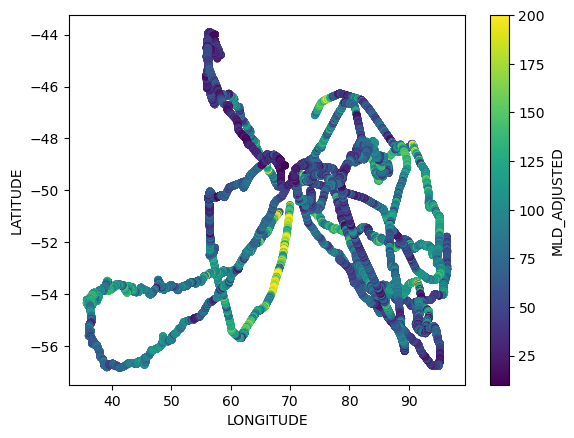

In [51]:
df.plot.scatter(x='LONGITUDE',y='LATITUDE',c='MLD_ADJUSTED',cmap='viridis',vmax=200)

In [52]:
df.groupby('smru_name').MLD_ADJUSTED.describe()

,count,mean,std,min,25%,50%,75%,max
smru_name,,,,,,,,
ft22-686-18,4306.0,48.794704,28.615984,10.0,30.0,42.0,59.0,211.0
ft22-873-18,5842.0,80.382744,43.731525,10.0,52.0,72.0,104.0,244.0
ft22-874-18,6205.0,91.811440,30.672937,10.0,71.0,92.0,113.0,212.0
ft22-875-18,4679.0,83.895279,38.609589,10.0,53.0,85.0,112.0,261.0
ft22-876-18,6717.0,71.645973,31.975002,10.0,47.0,69.0,94.0,214.0
ft22-878-18,4795.0,75.589363,30.057648,10.0,55.0,75.0,95.0,182.0
ft22-879-18,5517.0,73.464020,32.181042,10.0,51.0,70.0,93.0,218.0
ft22-881-18,5299.0,82.273636,31.582359,11.0,58.0,83.0,105.0,195.0
ft22-882-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.groupby('month').MLD_ADJUSTED.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,2552.0,50.239811,22.275684,10.0,34.0,49.0,65.0,131.0
10,5163.0,95.816383,46.109795,10.0,60.0,91.0,125.0,244.0
11,18026.0,85.609283,34.766273,10.0,60.0,87.0,111.0,261.0
12,17619.0,65.883591,28.188375,10.0,45.0,65.0,86.0,170.0


month
1     Axes(0.125,0.11;0.62x0.77)
10    Axes(0.125,0.11;0.62x0.77)
11    Axes(0.125,0.11;0.62x0.77)
12    Axes(0.125,0.11;0.62x0.77)
dtype: object

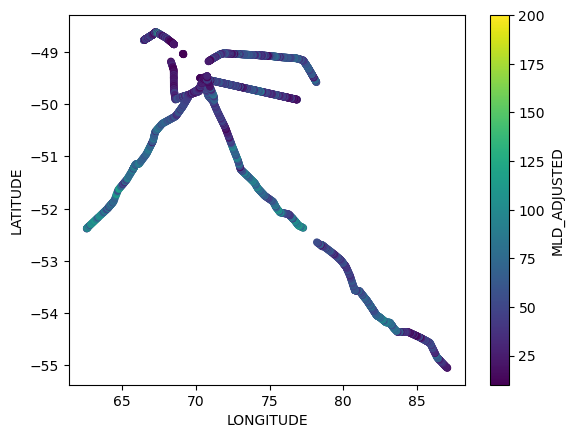

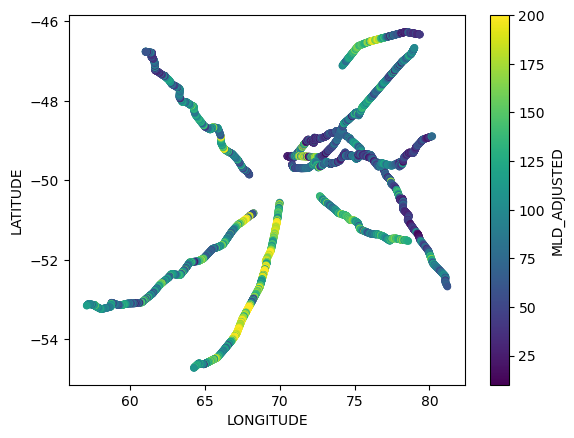

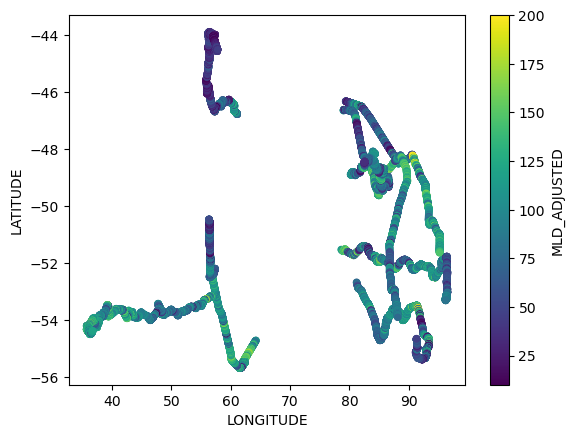

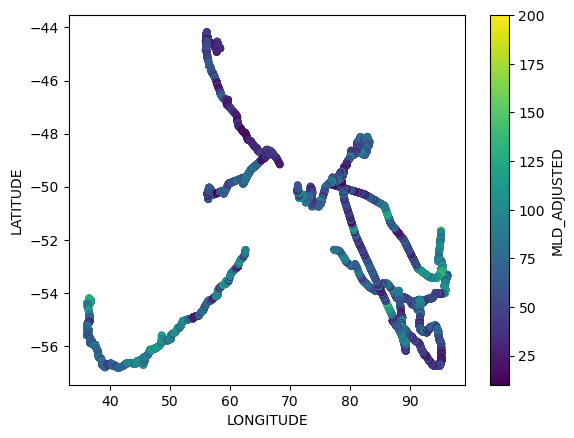

In [54]:
df.groupby('month').plot.scatter(x='LONGITUDE',y='LATITUDE',c='MLD_ADJUSTED',cmap='viridis',vmax=200)

## Bin data spatially

In [55]:
# how to bin data
def bin_2Ddata(df,col,xbins,ybins):
    import scipy.stats as stats

    df = df.dropna(subset=[col])
    data = df[col].values
    x = df.LONGITUDE.values
    y = df.LATITUDE.values

    statistic, xedges, yedges, binnumber = stats.binned_statistic_2d(
        x, y, values=data, statistic='mean', 
        bins=[xbins,ybins])
    ds = xr.Dataset({'MLD_ADJUSTED': xr.DataArray(dims=['LONGITUDE','LATITUDE'],coords={'LONGITUDE':xbins[:-1],'LATITUDE':ybins[:-1]},data=statistic.T)})
    return ds

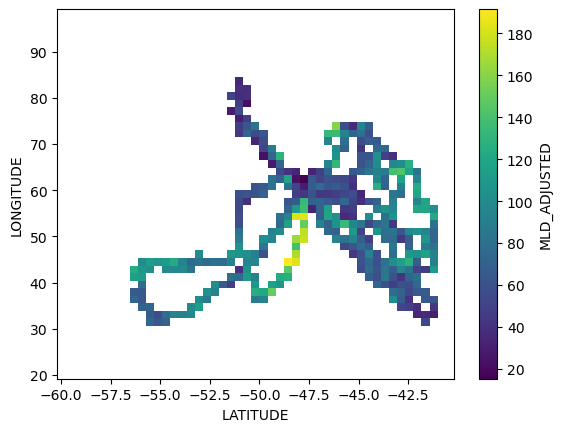

In [56]:
# bin all mld data on a regular grid
NX, NY = 50, 50
xbins = np.linspace(20,100,NX)
ybins = np.linspace(-60,-40,NY)
ds_bin = bin_2Ddata(df,'MLD_ADJUSTED',xbins,ybins)
ds_bin.MLD_ADJUSTED.plot()

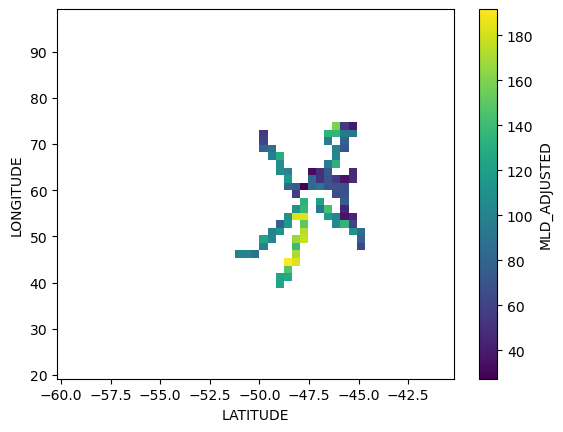

In [57]:
# bin only october mld data
df_oct = df.loc[df.month==10]
bin_2Ddata(df_oct,'MLD_ADJUSTED',xbins,ybins).MLD_ADJUSTED.plot()

Text(0.5, 1.0, 'Binned MLD, December')

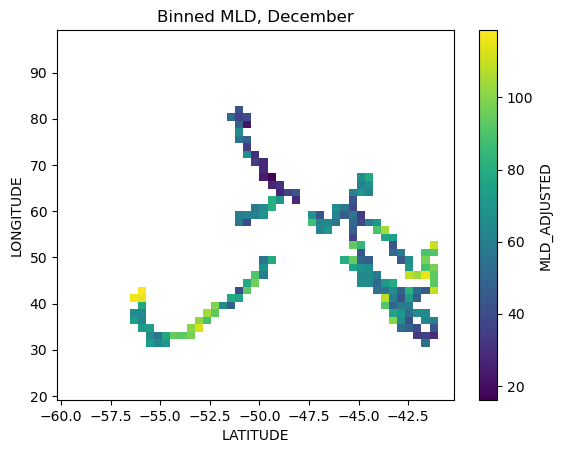

In [58]:
# same for december in one line
bin_2Ddata(df.loc[df.month==12],'MLD_ADJUSTED',xbins,ybins).MLD_ADJUSTED.plot()
plt.title('Binned MLD, December')